# Class 14

# Part-1

In [1]:
import pandas as pd 
import numpy as np
from sklearn.datasets import make_classification
#from sklearn.datasets import make_regression ## for regression

In [2]:
x,y = make_classification(n_samples=60000,n_features=25) #60k samples with 25 features

In [3]:
x.shape

(60000, 25)

In [4]:
y.shape

(60000,)

In [5]:
y = pd.DataFrame(y)

In [6]:
y.head()

,0
0,1
1,0
2,0
3,1
4,0


In [7]:
y.value_counts()

0    30032
1    29968
dtype: int64

In [8]:
x = pd.DataFrame(x)

In [9]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.813282,0.861449,-0.095235,-0.258837,0.737736,-0.052917,1.016528,0.233667,1.628008,0.355139,...,-1.240084,-0.169693,-0.236249,1.242933,0.247688,1.043003,0.656206,0.195873,0.231207,-0.035060
1,1.010817,-0.924341,0.573827,1.154146,2.282490,0.476943,-1.461153,1.108374,-1.037717,-1.172386,...,-0.063942,1.620686,-0.353917,-0.666436,-0.266368,0.724419,-1.847769,-1.053392,0.397982,-0.352097
2,0.348457,-1.661860,0.211729,-0.826569,0.884646,0.851525,1.241135,-0.489590,-1.454750,-1.313942,...,-0.032934,0.334680,-0.419110,0.014990,-0.075979,-1.190900,-0.828480,1.007076,-1.685480,0.370001
3,0.499187,0.807496,0.645802,1.774876,0.376123,-0.255018,-0.860259,-2.232027,-1.602594,-0.349025,...,0.455482,-0.400663,-0.065690,-0.198097,-0.627177,0.911288,1.413191,-0.082117,-0.955220,-0.877916
4,-0.410199,0.499524,-0.075766,-0.009722,1.213456,-0.940046,-0.822264,-1.983731,0.579409,-0.023268,...,0.218132,1.717145,-1.963868,1.916386,0.470670,-2.216984,-1.112306,-0.719640,0.282409,-0.409072


## Split data for train test

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.25,random_state=1)

In [12]:
xtrain.shape

(45000, 25)

In [13]:
train_accuracy = []
test_accuracy= []

max_features = [n for n in range (1,25)] # 0 is avoided

In [14]:
max_features

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

## Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
for depth in max_features:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(xtrain,ytrain) #training
    
    # train accuracy
    train_acc = clf.score(xtrain,ytrain)
    train_accuracy.append(train_acc)
    
    # test accuracy
    test_acc = clf.score(xtest,ytest)
    test_accuracy.append(test_acc)
    
    print('Max Depth = %d, Train Accuracy = %f, Test Accuracy = %f' %(depth,train_acc,test_acc))

Max Depth = 1, Train Accuracy = 0.913511, Test Accuracy = 0.912600
Max Depth = 2, Train Accuracy = 0.913511, Test Accuracy = 0.912600
Max Depth = 3, Train Accuracy = 0.925289, Test Accuracy = 0.925533
Max Depth = 4, Train Accuracy = 0.940111, Test Accuracy = 0.937800
Max Depth = 5, Train Accuracy = 0.940778, Test Accuracy = 0.938467
Max Depth = 6, Train Accuracy = 0.943689, Test Accuracy = 0.939267
Max Depth = 7, Train Accuracy = 0.945933, Test Accuracy = 0.939000
Max Depth = 8, Train Accuracy = 0.949244, Test Accuracy = 0.936000
Max Depth = 9, Train Accuracy = 0.953022, Test Accuracy = 0.935800
Max Depth = 10, Train Accuracy = 0.957489, Test Accuracy = 0.932333
Max Depth = 11, Train Accuracy = 0.961222, Test Accuracy = 0.932933
Max Depth = 12, Train Accuracy = 0.965289, Test Accuracy = 0.930533
Max Depth = 13, Train Accuracy = 0.968689, Test Accuracy = 0.930400
Max Depth = 14, Train Accuracy = 0.971933, Test Accuracy = 0.929200
Max Depth = 15, Train Accuracy = 0.975400, Test Accuracy 

## Visualize Result

In [17]:
from matplotlib import pyplot as plt

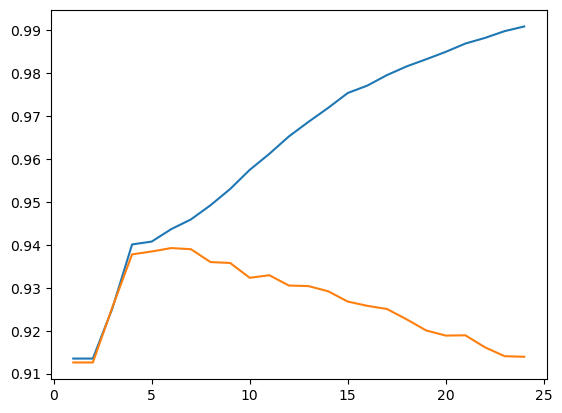

In [18]:
plt.plot(max_features,train_accuracy)
plt.plot(max_features,test_accuracy)

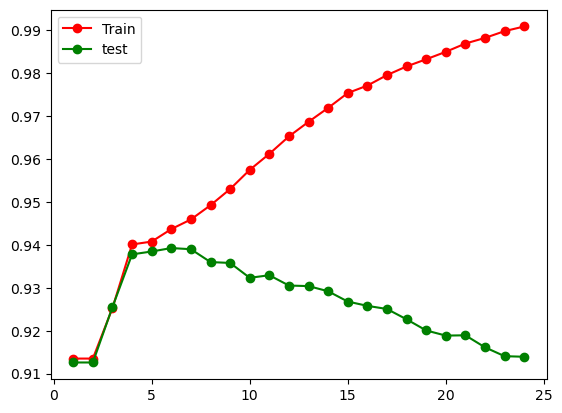

In [19]:
plt.plot(max_features,train_accuracy, '-o',color='red', label='Train')
plt.plot(max_features,test_accuracy, '-o',color='green', label='test')
plt.legend()

# Part 2

In [20]:
import pandas as pd 
import numpy as np

In [21]:
df = pd.read_csv('/kaggle/input/dataset-to-perform-regression-and-classification/Credit_Card.csv')

In [22]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [23]:
df.shape

(30000, 25)

In [24]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [25]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [27]:
df = df.rename(columns={'default.payment.next.month':'payments'})

In [28]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,payments
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [29]:
x = df.drop(['ID','payments'],axis=1)
y = df['payments']

In [30]:
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [31]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: payments, dtype: int64

In [32]:
y.value_counts()

0    23364
1     6636
Name: payments, dtype: int64

In [33]:
23364/(23364+6636)

0.7788

## Extra Tree Classifier

In [34]:
from sklearn.ensemble import ExtraTreesClassifier #Decision Tree

In [35]:
extr = ExtraTreesClassifier()

In [36]:
extr.fit(x,y)

ExtraTreesClassifier()

In [37]:
extr.feature_importances_

array([0.06575117, 0.01080633, 0.03248958, 0.02188153, 0.06638525,
       0.09641061, 0.04771268, 0.03503253, 0.02911777, 0.0312817 ,
       0.02932817, 0.0505669 , 0.04669142, 0.04490675, 0.04448552,
       0.04412623, 0.04417248, 0.04448506, 0.04215025, 0.04188642,
       0.04103187, 0.04289883, 0.04640094])

In [38]:
feature_importance = extr.feature_importances_
feature_importance #Info Gain

array([0.06575117, 0.01080633, 0.03248958, 0.02188153, 0.06638525,
       0.09641061, 0.04771268, 0.03503253, 0.02911777, 0.0312817 ,
       0.02932817, 0.0505669 , 0.04669142, 0.04490675, 0.04448552,
       0.04412623, 0.04417248, 0.04448506, 0.04215025, 0.04188642,
       0.04103187, 0.04289883, 0.04640094])

In [39]:
imp = pd.DataFrame(feature_importance, columns=['Gain_Score'])
imp.head()

,Gain_Score
0,0.065751
1,0.010806
2,0.032490
3,0.021882
4,0.066385


In [40]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [41]:
cols = pd.DataFrame(x.columns, columns=['Feature_Names'])
cols

,Feature_Names
0,LIMIT_BAL
1,SEX
2,EDUCATION
3,MARRIAGE
4,AGE
5,PAY_0
6,PAY_2
7,PAY_3
8,PAY_4
9,PAY_5


In [42]:
gains = pd.concat([cols,imp],axis=1)
gains #Which column has how much gain score

,Feature_Names,Gain_Score
0,LIMIT_BAL,0.065751
1,SEX,0.010806
2,EDUCATION,0.032490
3,MARRIAGE,0.021882
4,AGE,0.066385
5,PAY_0,0.096411
6,PAY_2,0.047713
7,PAY_3,0.035033
8,PAY_4,0.029118
9,PAY_5,0.031282


In [43]:
gains.nlargest(5,'Gain_Score')

,Feature_Names,Gain_Score
5,PAY_0,0.096411
4,AGE,0.066385
0,LIMIT_BAL,0.065751
11,BILL_AMT1,0.050567
6,PAY_2,0.047713


In [44]:
gains.nsmallest(5,'Gain_Score')

,Feature_Names,Gain_Score
1,SEX,0.010806
3,MARRIAGE,0.021882
8,PAY_4,0.029118
10,PAY_6,0.029328
9,PAY_5,0.031282


In [45]:
newx = gains.nlargest(10,'Gain_Score')
newx

,Feature_Names,Gain_Score
5,PAY_0,0.096411
4,AGE,0.066385
0,LIMIT_BAL,0.065751
11,BILL_AMT1,0.050567
6,PAY_2,0.047713
12,BILL_AMT2,0.046691
22,PAY_AMT6,0.046401
13,BILL_AMT3,0.044907
14,BILL_AMT4,0.044486
17,PAY_AMT1,0.044485


<Axes: >

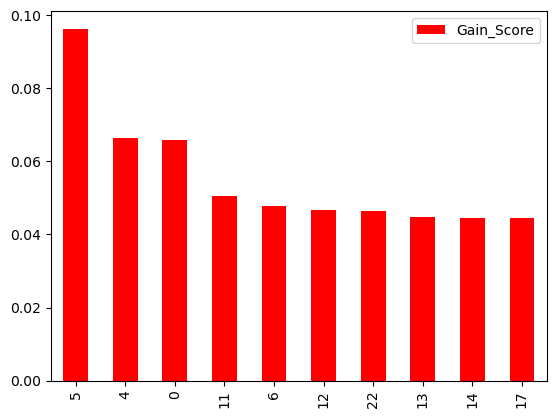

In [46]:
newx.plot(kind='bar',color=['red'])

<Axes: >

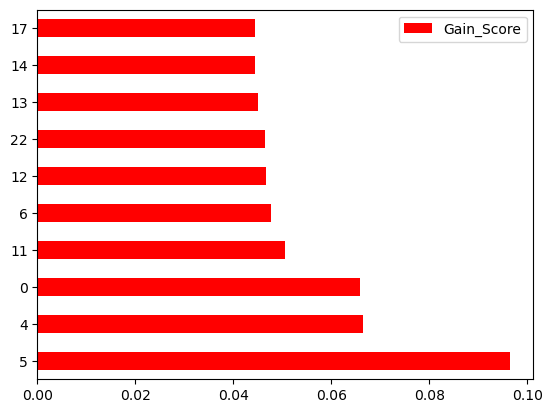

In [47]:
newx.plot(kind='barh',color=['red'])

In [48]:
import matplotlib.pyplot as plt

<Axes: >

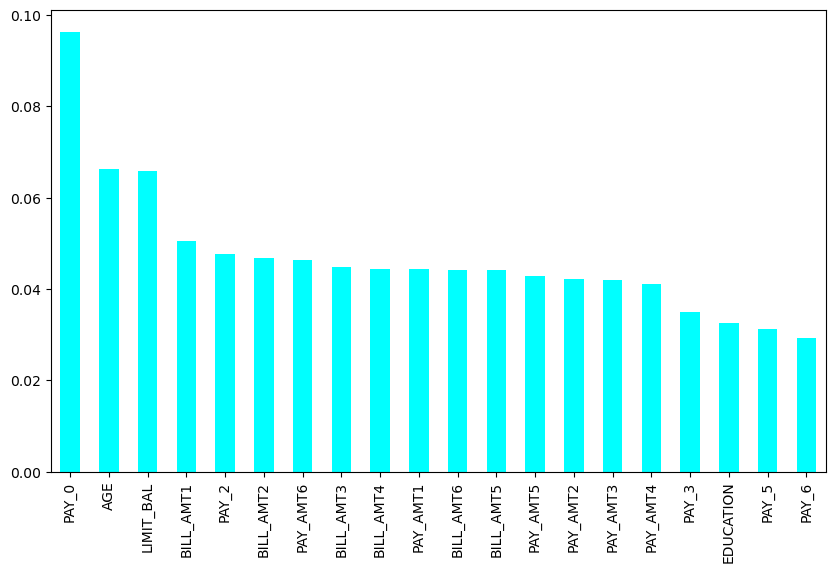

In [49]:
features = pd.Series(extr.feature_importances_, index = x.columns)
plt.figure(figsize=(10,6))
features.nlargest(20).plot(kind='bar',color='cyan')

<Axes: >

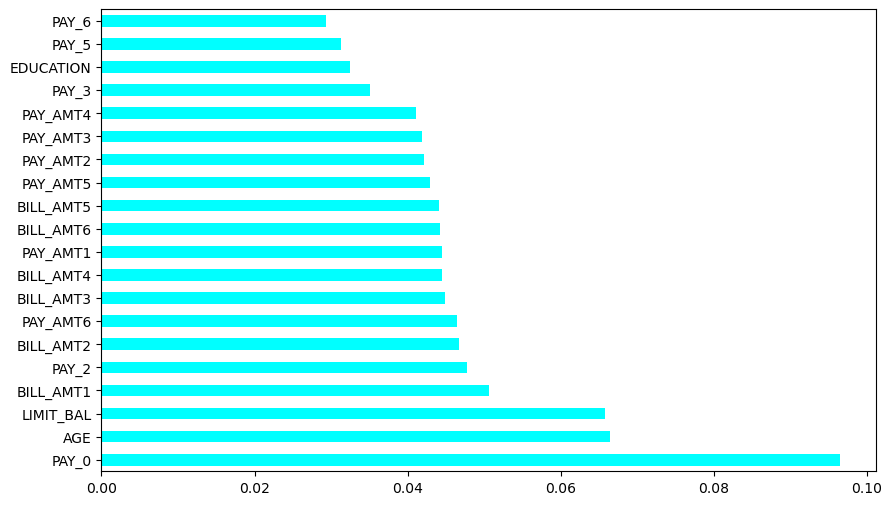

In [50]:
features = pd.Series(extr.feature_importances_, index = x.columns)
plt.figure(figsize=(10,6))
features.nlargest(20).plot(kind='barh',color='cyan')

In [51]:
x.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027


In [52]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [53]:
import seaborn as sns

<Axes: >

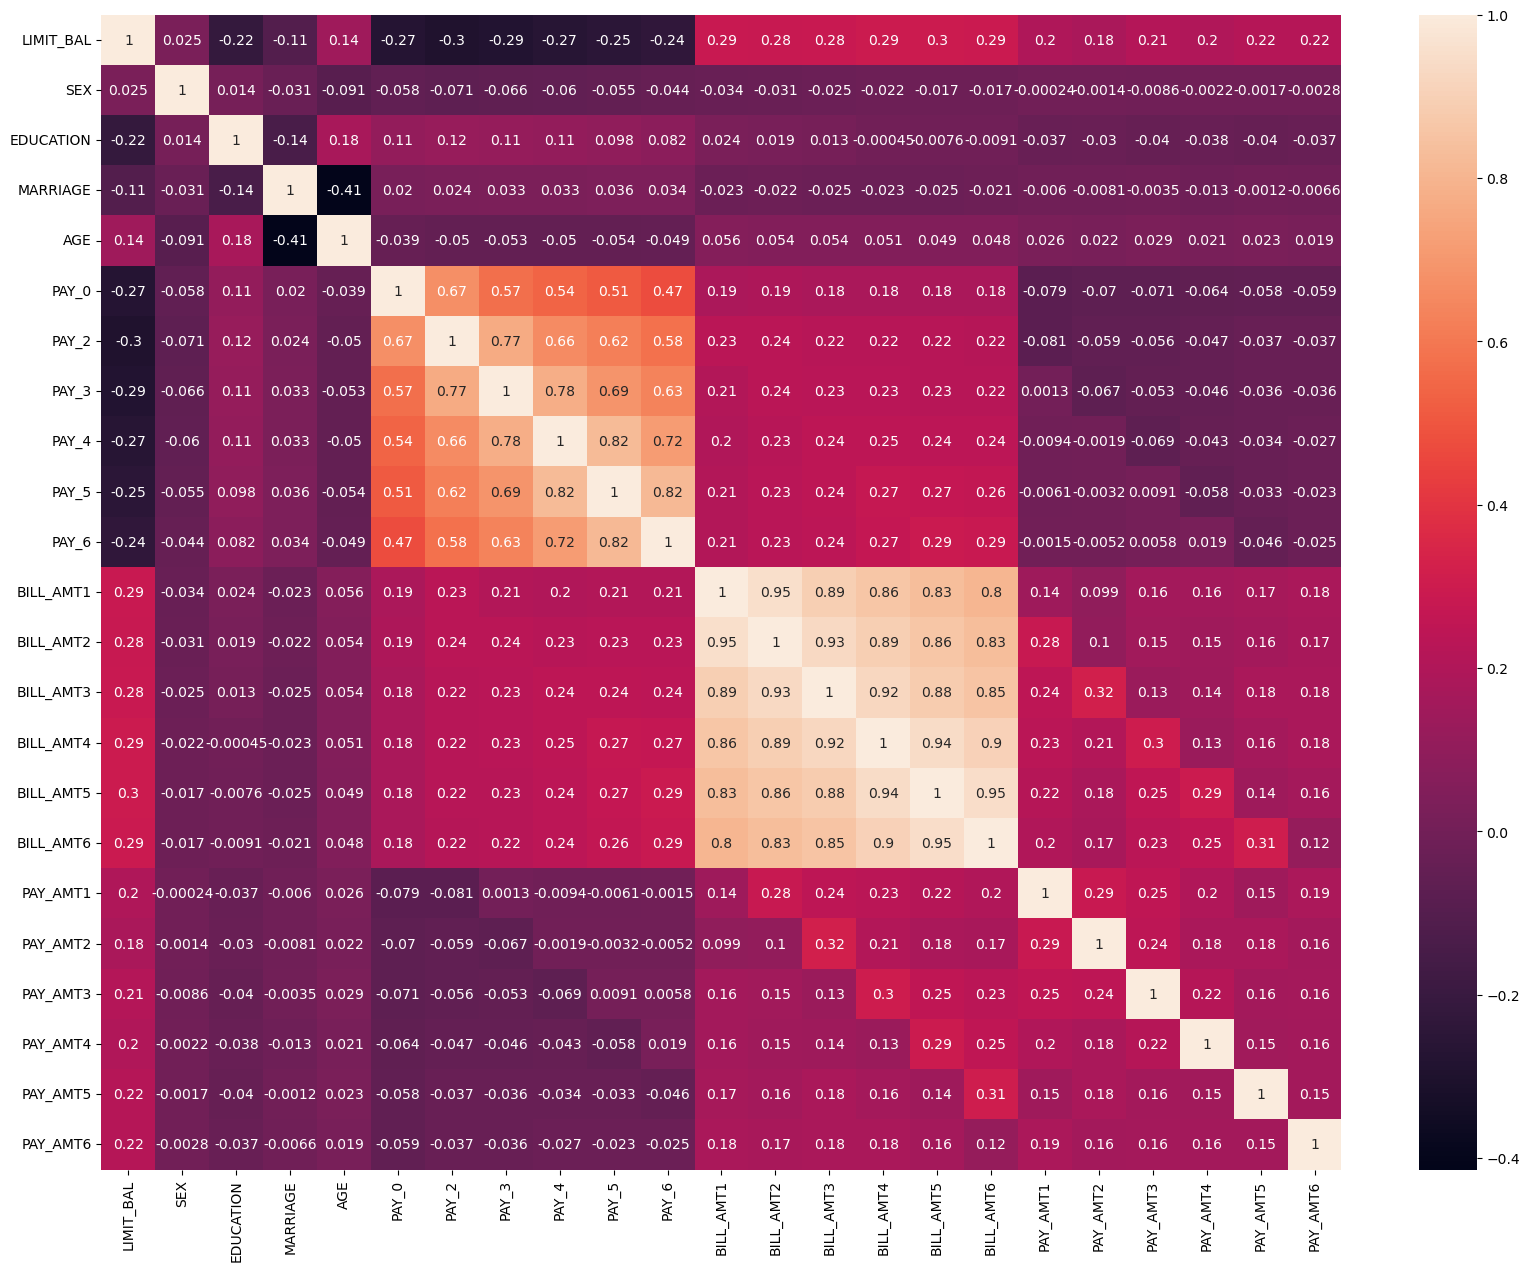

In [54]:
colname = x.corr().index
plt.figure(figsize=(20,15))
sns.heatmap(df[colname].corr(),annot=True)

## Select K Best

In [55]:
df = pd.read_csv('/kaggle/input/dataset-to-perform-regression-and-classification/Credit_Card.csv')
df = df.rename(columns={'default.payment.next.month':'payments'})
x = df.drop(['ID','payments'],axis=1)
y = df['payments']

In [56]:
from sklearn.feature_selection import SelectKBest, f_classif

In [57]:
model2 = SelectKBest(score_func=f_classif)

In [58]:
feature_score = model2.fit(x,y)

In [59]:
feature_score.scores_

array([7.24068539e+02, 4.79788543e+01, 2.35471118e+01, 1.77812714e+01,
       5.78855582e+00, 3.53771497e+03, 2.23916914e+03, 1.75746644e+03,
       1.47684597e+03, 1.30459118e+03, 1.08540249e+03, 1.15805315e+01,
       6.04423789e+00, 5.94438771e+00, 3.09474518e+00, 1.37108740e+00,
       8.65820292e-01, 1.60403810e+02, 1.03291524e+02, 9.52180109e+01,
       9.71880005e+01, 9.14298008e+01, 8.50890453e+01])

In [60]:
cols = pd.DataFrame(feature_score.scores_ , columns=['Feature_Scores'])
cols

,Feature_Scores
0,724.068539
1,47.978854
2,23.547112
3,17.781271
4,5.788556
5,3537.714970
6,2239.169136
7,1757.466444
8,1476.845967
9,1304.591176


In [61]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [62]:
col2 = pd.DataFrame(x.columns,columns=['Feature_Names'])
col2

,Feature_Names
0,LIMIT_BAL
1,SEX
2,EDUCATION
3,MARRIAGE
4,AGE
5,PAY_0
6,PAY_2
7,PAY_3
8,PAY_4
9,PAY_5


In [63]:
scores = pd.concat([col2,cols],axis=1)
scores

,Feature_Names,Feature_Scores
0,LIMIT_BAL,724.068539
1,SEX,47.978854
2,EDUCATION,23.547112
3,MARRIAGE,17.781271
4,AGE,5.788556
5,PAY_0,3537.714970
6,PAY_2,2239.169136
7,PAY_3,1757.466444
8,PAY_4,1476.845967
9,PAY_5,1304.591176


In [64]:
newx = scores.nlargest(15,'Feature_Scores')
newx

,Feature_Names,Feature_Scores
5,PAY_0,3537.714970
6,PAY_2,2239.169136
7,PAY_3,1757.466444
8,PAY_4,1476.845967
9,PAY_5,1304.591176
10,PAY_6,1085.402485
0,LIMIT_BAL,724.068539
17,PAY_AMT1,160.403810
18,PAY_AMT2,103.291524
20,PAY_AMT4,97.188000


## PCA

In [65]:
import pandas as pd
df = pd.read_csv('/kaggle/input/dataset-to-perform-regression-and-classification/Credit_Card.csv')
df = df.rename(columns={'default.payment.next.month':'payment'})
x = df.drop(['ID','payment'],axis=1)
y = df['payment']

In [66]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler

In [67]:
mmx = MinMaxScaler()

In [68]:
scaled_x = mmx.fit_transform(x)

In [69]:
scaled_x

array([[0.01010101, 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 1.        , 0.33333333, ..., 0.00161031, 0.        ,
        0.00378311],
       [0.08080808, 1.        , 0.33333333, ..., 0.00161031, 0.00234451,
        0.00945777],
       ...,
       [0.02020202, 0.        , 0.33333333, ..., 0.00676329, 0.00468901,
        0.00586382],
       [0.07070707, 0.        , 0.5       , ..., 0.00310145, 0.12417444,
        0.00341236],
       [0.04040404, 0.        , 0.33333333, ..., 0.00161031, 0.00234451,
        0.00189155]])

In [70]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_x)

In [72]:
x_pca

array([[-0.40423245, -0.00800476, -0.00259671],
       [-0.39188881,  0.209224  , -0.1969876 ],
       [-0.39264215,  0.08409527, -0.12656657],
       ...,
       [ 0.62351265,  0.33728836, -0.08489176],
       [ 0.60374479, -0.01953156,  0.21421109],
       [ 0.60917214,  0.0099741 ,  0.23321987]])

In [73]:
features = pd.DataFrame(x_pca,columns=['pca1','pca2','pca3'])
features

,pca1,pca2,pca3
0,-0.404232,-0.008005,-0.002597
1,-0.391889,0.209224,-0.196988
2,-0.392642,0.084095,-0.126567
3,-0.394038,0.068885,0.154030
4,0.610813,-0.089679,0.334445
...,...,...,...
29995,0.605245,0.027127,0.231678
29996,0.601275,-0.132858,-0.028314
29997,0.623513,0.337288,-0.084892
29998,0.603745,-0.019532,0.214211


In [74]:
import plotly.express as pl
pl.scatter_3d(features, x='pca1', y='pca2', z='pca3', color='pca1')

## Train Test

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
xtrain,xtest, ytrain,ytest = train_test_split(features,y,test_size=.30,  random_state=1)

In [77]:
xtrain

,pca1,pca2,pca3
4936,0.588201,-0.220413,-0.321038
4788,0.616076,0.062374,0.319937
8447,-0.396698,0.103833,-0.210450
4535,0.588418,-0.368499,-0.139352
27563,0.619138,0.027233,0.115131
...,...,...,...
17289,-0.387321,0.169520,0.248251
5192,-0.413089,-0.415968,0.140726
12172,0.599752,0.071849,-0.267975
235,0.595272,-0.211586,-0.193925


In [78]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [79]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [80]:
clf.score(xtest,ytest)

0.716

## Before PCA

In [81]:
xtrain1,xtest1, ytrain1,ytest1=train_test_split(x,y,test_size=.30, random_state=1)

In [82]:
xtrain1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
4936,20000.0,1,1,2,24,-1,-1,-1,-1,-1,...,390.0,780.0,0.0,0.0,390.0,390.0,780.0,0.0,0.0,0.0
4788,120000.0,1,2,1,52,2,0,0,0,0,...,105262.0,46605.0,45590.0,46204.0,4449.0,2731.0,3000.0,5000.0,3000.0,3000.0
8447,70000.0,2,2,2,26,0,0,0,0,0,...,26103.0,28342.0,24894.0,25272.0,3003.0,5106.0,4026.0,755.0,1029.0,5303.0
4535,230000.0,1,2,2,37,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27563,130000.0,1,2,2,56,0,0,0,0,0,...,111780.0,116357.0,96936.0,98173.0,4000.0,5000.0,8000.0,4000.0,4000.0,5000.0


In [83]:
clf.fit(xtrain1,ytrain1)

DecisionTreeClassifier()

In [84]:
clf.score(xtest1,ytest1)

0.7197777777777777

In [85]:
clf.score(xtrain1,ytrain1)

0.9993333333333333